# Data Analysis Project

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib_venn import venn2
import pydst # Danmarks Statistik
from datetime import datetime

In [39]:
Dst = pydst.Dst(lang='en') # Set language to English

In [40]:
Dst.get_subjects() # Get overview of Statistics Denmark's subjects

,active,desc,hasSubjects,id
0,True,Population and elections,True,02
1,True,Living conditions,True,05
2,True,Education and knowledge,True,03
3,True,Culture and National Church,True,18
4,True,"Labour, income and wealth",True,04
5,True,Prices and consumption,True,06
6,True,National accounts and government finances,True,14
7,True,Money and credit market,True,16
8,True,External economy,True,13
9,True,Business sector in general,True,07


In [41]:
Dst.get_data(table_id = 'BB1S')

,POST,INDUDBOP,SÆSON,LAND,TID,INDHOLD
0,GOODS (FOB),Current receipts,Non-seasonally adjusted,REST OF THE WORLD,2005M01,34.8


In [5]:
Var = Dst.get_variables(table_id = 'BB1S')

In [6]:
Var[:]

,elimination,id,text,time,values
0,True,POST,items,False,"[{'id': '1.A.A', 'text': 'GOODS (FOB)'}, {'id'..."
1,False,INDUDBOP,receipts/expenditure,False,"[{'id': 'K', 'text': 'Current receipts'}, {'id..."
2,False,SÆSON,seasonal adjustment,False,"[{'id': '1', 'text': 'Non-seasonally adjusted'..."
3,True,LAND,country,False,"[{'id': 'W1', 'text': 'REST OF THE WORLD'}, {'..."
4,False,Tid,time,True,"[{'id': '2005M01', 'text': '2005M01'}, {'id': ..."


In [7]:
Var['values'][3][:10]

[{'id': 'W1', 'text': 'REST OF THE WORLD'},
 {'id': 'B5', 'text': 'EU-28'},
 {'id': 'D5', 'text': 'Extra EU-28'}]

In [42]:
df= Dst.get_data(table_id = 'BB1S', variables={'TID':['*'], 'SÆSON':['2'], 'LAND':['W1'], 'POST':['*'], 'INDUDBOP':['N']})

In [43]:
df.sort_values(['TID'], inplace=True)

In [45]:
df.head(5)

,TID,SÆSON,LAND,POST,INDUDBOP,INDHOLD
174,2005M01,Seasonally adjusted,REST OF THE WORLD,PRIMARY INCOME,Net receipts,0.6
173,2005M01,Seasonally adjusted,REST OF THE WORLD,SERVICES,Net receipts,2.1
175,2005M01,Seasonally adjusted,REST OF THE WORLD,SECONDARY INCOME,Net receipts,-2.2
172,2005M01,Seasonally adjusted,REST OF THE WORLD,GOODS (FOB),Net receipts,5.8
171,2005M01,Seasonally adjusted,REST OF THE WORLD,CURRENT ACCOUNT,Net receipts,6.3


In [46]:
df['TID'] = df['TID'].str.replace('M', '-')

In [52]:
df['TID'] = pd.to_datetime(df['TID'])

In [53]:
PI  = df.loc[df['POST'] == 'PRIMARY INCOME', :]

In [55]:
PI['TID']

174   2005-01-01
179   2005-02-01
184   2005-03-01
189   2005-04-01
194   2005-05-01
199   2005-06-01
204   2005-07-01
209   2005-08-01
214   2005-09-01
219   2005-10-01
224   2005-11-01
229   2005-12-01
234   2006-01-01
239   2006-02-01
244   2006-03-01
249   2006-04-01
254   2006-05-01
259   2006-06-01
264   2006-07-01
269   2006-08-01
274   2006-09-01
279   2006-10-01
284   2006-11-01
289   2006-12-01
294   2007-01-01
299   2007-02-01
304   2007-03-01
309   2007-04-01
0     2007-05-01
5     2007-06-01
         ...    
454   2016-08-01
484   2016-09-01
489   2016-10-01
494   2016-11-01
499   2016-12-01
504   2017-01-01
533   2017-02-01
538   2017-03-01
543   2017-04-01
548   2017-05-01
553   2017-06-01
582   2017-07-01
587   2017-08-01
592   2017-09-01
597   2017-10-01
602   2017-11-01
632   2017-12-01
637   2018-01-01
642   2018-02-01
647   2018-03-01
652   2018-04-01
681   2018-05-01
686   2018-06-01
691   2018-07-01
696   2018-08-01
701   2018-09-01
730   2018-10-01
735   2018-11-

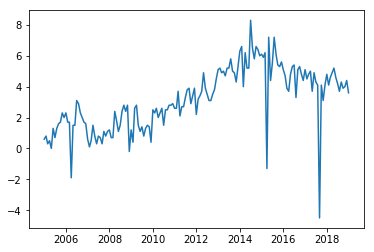

In [56]:
fig, ax = plt.subplots()

ax.plot(PI['TID'],PI['INDHOLD'])


plt.show()